# Investigating Stop and Frisk

**GOALS**:

- Access datasets as external files
- Create `DataFrame` from file
- Select rows and columns from the `DataFrame`
- Filter values in `DataFrame` based on logical conditions
- Split, Apply, Combine using `groupby` method
- Use *histograms, boxplots, barplots,* and *countplots* to investigate distributions of quantitative variables
- Use `.corr()` to explore relationships between variables and visualize with `heatmap`
- Use *scatterplots* to examine relationships between quantitative variables

## The Stop and Frisk Data

To start, we want to create a `DataFrame` from our `.csv` file we downloaded from the NYPD shared data.  

![](images/nypd.png)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#read in the data
df = pd.read_csv('../data/sqf-2017.csv')

In [3]:
#look at first five rows
df.head()

,STOP_FRISK_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,SPRINT_NUMBER,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
1,2,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
2,3,2/8/2017,11:10:00,2017,February,Wednesday,Based on C/W on Scene,17020808555,APP,POM,...,C,(null),WALL STREET && BROADWAY,(null),WALL STREET,981005,197131,(null),PBMS,MANHATTAN
3,4,2/20/2017,11:35:00,2017,February,Monday,Based on Self Initiated,9027,APP,POM,...,H,(null),75 GREENE STREET,(null),GREENE STREET,984031,202796,(null),PBMS,MANHATTAN
4,5,2/21/2017,13:20:00,2017,February,Tuesday,Based on Radio Run,10439,APP,POM,...,H,2,429 WEST BROADWAY,(null),WEST BROADWAY,983894,203523,(null),PBMS,MANHATTAN


In [4]:
#examine variables and variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11629 entries, 0 to 11628
Data columns (total 86 columns):
STOP_FRISK_ID                                                   11629 non-null int64
STOP_FRISK_DATE                                                 11629 non-null object
STOP_FRISK_TIME                                                 11624 non-null object
YEAR2                                                           11629 non-null int64
MONTH2                                                          11629 non-null object
DAY2                                                            11629 non-null object
STOP_WAS_INITIATED                                              11629 non-null object
SPRINT_NUMBER                                                   11202 non-null object
RECORD_STATUS_CODE                                              11629 non-null object
ISSUING_OFFICER_RANK                                            11629 non-null object
ISSUING_OFFICER_COMMAND_CODE     

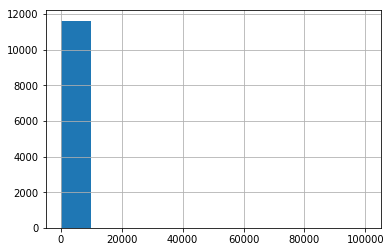

In [5]:
#examine distribution
df.OBSERVED_DURATION_MINUTES.hist()

In [6]:
df.OBSERVED_DURATION_MINUTES.mean()

28.94083756126924

In [7]:
df.OBSERVED_DURATION_MINUTES.describe()

count    11629.000000
mean        28.940838
std        975.822879
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      99999.000000
Name: OBSERVED_DURATION_MINUTES, dtype: float64

In [8]:
df.SUSPECT_RACE_DESCRIPTION.value_counts()

BLACK             6595
WHITE HISPANIC    2570
BLACK HISPANIC     997
WHITE              977
(null)             268
ASIAN/PAC.ISL      206
AMER IND             9
MALE                 7
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64